In [ ]:
!pip3 uninstall -y opencv-contrib-python 
!pip3 uninstall -y opencv-python

!pip3 install opencv-contrib-python
!pip3 install opencv-python

Found existing installation: opencv-contrib-python 4.5.5.64
Uninstalling opencv-contrib-python-4.5.5.64:
  Successfully uninstalled opencv-contrib-python-4.5.5.64
Found existing installation: opencv-python 4.5.5.64
Uninstalling opencv-python-4.5.5.64:
  Successfully uninstalled opencv-python-4.5.5.64
  Using cached opencv_contrib_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (66.7 MB)


  Using cached opencv_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import argparse
import math

# SIFT descriptor

In [47]:
def sift_detect(img1, img2):
    gray_img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    gray_img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)    

    sift_detector = cv.SIFT_create()
    (keypoints1, descriptions1) = sift_detector.detectAndCompute(gray_img1, None)
    (keypoints2, descriptions2) = sift_detector.detectAndCompute(gray_img2, None)

    print("Keypoints: {}, descriptors: {}".format(len(keypoints1), descriptions1.shape))
    print("Keypoints: {}, descriptors: {}".format(len(keypoints2), descriptions2.shape))
    return keypoints1, descriptions1, keypoints2, descriptions2

# Brute-Force opencv matcher

In [49]:
def brute_force_opencv_matcher(kps1, descs1, kps2, descs2,img1, img2):
    bf = cv.BFMatcher(cv.NORM_L1)
    matches = bf.knnMatch(descs1,descs2, k=2)

    # Apply ratio Lowe's test
    good = []
    for m, n in matches:
        if m.distance < 0.55 * n.distance:
            good.append([m])
    
    img3 = cv.drawMatchesKnn(img1, kps1, img2, kps2, good[1:20], None, flags=2)
    plt.figure(figsize=(20,20))
    plt.imshow(img3) 
    plt.show() 

# Own matcher

In [ ]:
def own_mathcher(kps1, descs1, kps2, descs2,img1, img2):
    matches = []
    for i, k1 in enumerate(descs1):
        for j, k2 in enumerate(descs2):
            matches.append(cv.DMatch(_distance=np.linalg.norm((k1 - k2), ord=1), _imgIdx=0, _queryIdx=i, _trainIdx=j))
            
    matches = sorted(matches, key = lambda x : x.distance)
    img3 = cv.drawMatches(img1, kps1, img2, kps2, matches[:20], None, flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) # DRAW_RICH_KEYPOINTS 
    plt.figure(figsize=(20,20))
    plt.imshow(img3) 
    plt.show()

In [ ]:
from skimage import io

img1 = io.imread('https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fkaravan.ua%2Fwp-content%2Fuploads%2F2022%2F03%2Fkit-stepan-stav-volonterom.jpg&f=1&nofb=1')
img2 = cv.rotate(io.imread('https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fshowbiz.24tv.ua%2Fresources%2Fphotos%2Fnews%2F202203%2F1924846.jpg%3Fv%3D1648479615000%26w%3D1200%26h%3D675%26fit%3Dcover&f=1&nofb=1'), cv.cv2.ROTATE_90_CLOCKWISE)

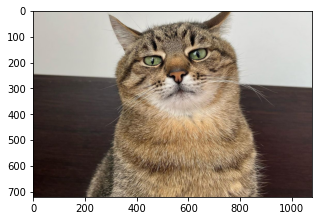

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(img1)

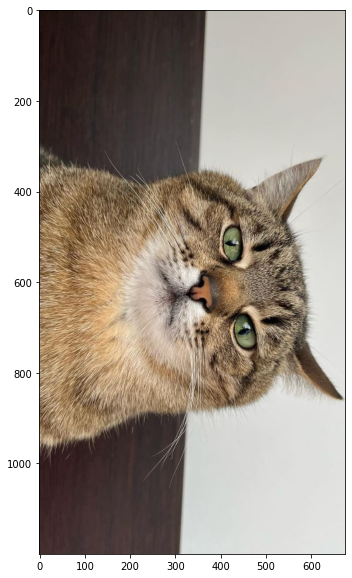

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img2)

In [48]:
kps1, descs1, kps2, descs2 = sift_detect(img1, img2)

Keypoints: 3473, descriptors: (3473, 128)
Keypoints: 3507, descriptors: (3507, 128)


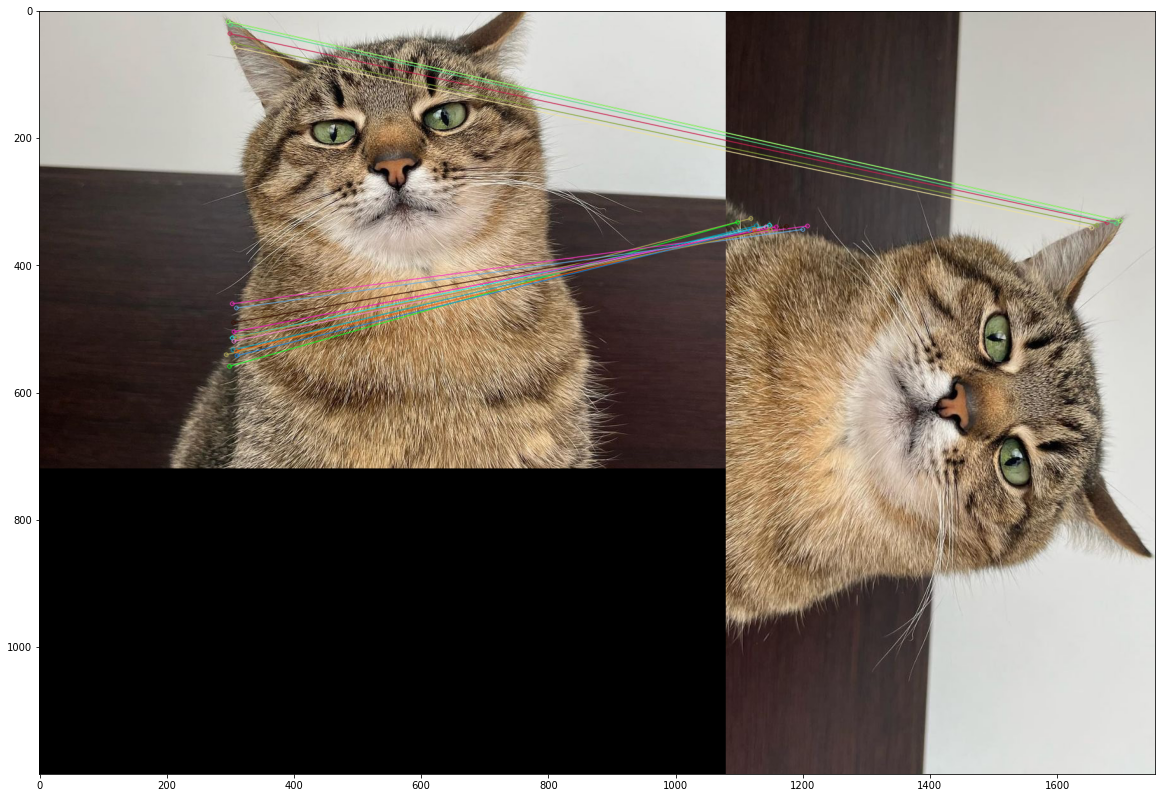

In [50]:
brute_force_opencv_matcher(kps1, descs1, kps2, descs2, img1, img2)

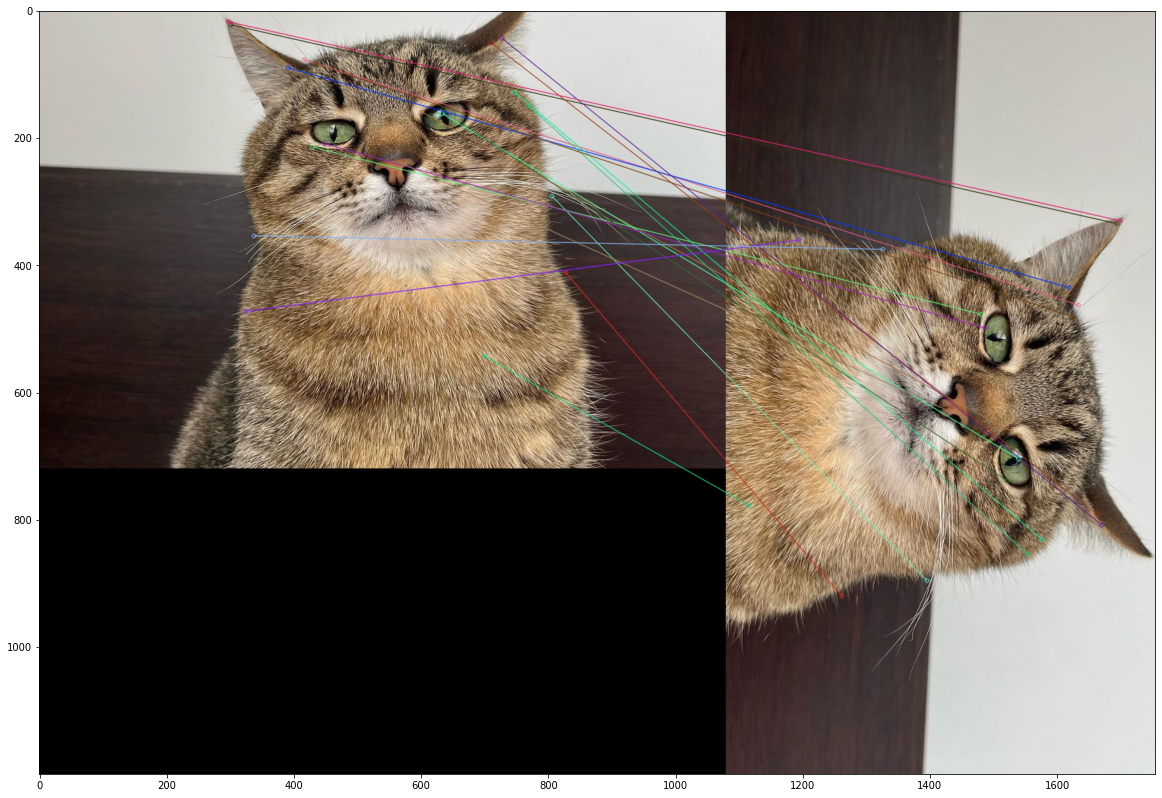

In [ ]:
own_mathcher(kps1, descs1, kps2, descs2, img1, img2)